In [5]:
gen_model_name = 'OracleInpainter'
#gen_model_name = 'LocalMeanInpainter'
#gen_model_name = 'RandomColorWithNoiseInpainter'
#gen_model_name = 'BlurryInpainter'
reg_coef = 5e-2
save_dir = './imgs'
classifier = 'neuralnet'
#classifier = 'logisticregression'  # LR isn't fully supported; has bugs with OracleInpainter


# danger
import shutil, os
clean_slate = True
if clean_slate and os.path.exists(os.path.join(save_dir, gen_model_name)):
    shutil.rmtree(os.path.join(save_dir, gen_model_name))


%run synthetic.py --classifier $classifier --importance-method vbd_sdr --dropout_param_size 28 28 --epochs 500 --lr 0.05 --reg-coef $reg_coef --batch-size 8 --num-samples 1 --gen-model-name $gen_model_name --save-dir $save_dir --num-imgs 10 --dataset valid/ --gpu-ids 0 --num-examples 6000 --overwrite --no-cuda

args: Namespace(ard_init=0.0, batch_size=8, bvlc_dir='nets/BVLC/', classifier='neuralnet', cuda=False, dataset='valid/', dropout_param_size=[28, 28], epoch_print=1, epochs=500, eval_samples=1, gan_g_dir='nets/GAN/', gen_model_name='OracleInpainter', gen_model_path=None, gpu_ids=[0], image_offset=0, importance_method='vbd_sdr', lr=0.05, no_cuda=True, num_examples=6000, num_imgs=10, num_samples=1, overwrite=True, prior=0.5, reg_coef=0.05, rw_max=30, save_dir='./imgs', save_tag='', seed=1, tv_coef=0.0, verbose=1, visdom_enabled=False, visualize=False, window=1)
==================== Start =====================

done training neural net
img_idx: 0
Start evaluating image...
epoch 0 / 500: loss 5.83256 (5.83256, 0.00000), acc 0.75, range: (-0.05, 0.00, 0.05), takes 0.02s,  
epoch 1 / 500: loss -1.57449 (-2.22865, 0.65415), acc 0.12, range: (-0.10, -0.01, 0.10), takes 0.01s,  
epoch 2 / 500: loss 4.03274 (2.72933, 1.30340), acc 0.62, range: (-0.15, -0.02, 0.15), takes 0.00s,  
epoch 3 / 500: l

epoch 102 / 500: loss 11.80738 (6.87327, 4.93411), acc 0.88, range: (-3.78, -2.80, 1.96), takes 0.00s,  
epoch 103 / 500: loss 7.86716 (2.94875, 4.91841), acc 0.62, range: (-3.79, -2.81, 1.98), takes 0.00s,  
epoch 104 / 500: loss 0.14767 (-4.75560, 4.90327), acc 0.38, range: (-3.80, -2.82, 1.99), takes 0.00s,  
epoch 105 / 500: loss 3.62238 (-1.26587, 4.88825), acc 0.62, range: (-3.82, -2.83, 2.00), takes 0.00s,  
epoch 106 / 500: loss 8.73935 (3.86484, 4.87451), acc 0.75, range: (-3.83, -2.85, 2.01), takes 0.00s,  
epoch 107 / 500: loss 7.62269 (2.76266, 4.86003), acc 0.62, range: (-3.84, -2.86, 2.01), takes 0.00s,  
epoch 108 / 500: loss 7.75834 (2.91305, 4.84529), acc 0.75, range: (-3.85, -2.87, 2.02), takes 0.00s,  
epoch 109 / 500: loss 12.05587 (7.22472, 4.83115), acc 1.00, range: (-3.87, -2.88, 2.02), takes 0.00s,  
epoch 110 / 500: loss 11.58515 (6.76901, 4.81614), acc 0.75, range: (-3.88, -2.89, 2.03), takes 0.00s,  
epoch 111 / 500: loss 3.64304 (-1.15791, 4.80095), acc 0.50

epoch 218 / 500: loss 10.06787 (6.09232, 3.97555), acc 0.88, range: (-4.75, -3.64, 2.78), takes 0.02s,  
epoch 219 / 500: loss 10.50610 (6.53249, 3.97361), acc 0.88, range: (-4.75, -3.65, 2.79), takes 0.02s,  
epoch 220 / 500: loss 7.25811 (3.28727, 3.97084), acc 0.75, range: (-4.76, -3.65, 2.80), takes 0.00s,  
epoch 221 / 500: loss 5.04123 (1.07241, 3.96881), acc 0.62, range: (-4.76, -3.65, 2.81), takes 0.00s,  
epoch 222 / 500: loss 2.97699 (-0.98938, 3.96638), acc 0.62, range: (-4.77, -3.66, 2.82), takes 0.00s,  
epoch 223 / 500: loss 9.48046 (5.51624, 3.96422), acc 0.75, range: (-4.77, -3.66, 2.83), takes 0.00s,  
epoch 224 / 500: loss 4.34054 (0.37882, 3.96172), acc 0.62, range: (-4.78, -3.67, 2.84), takes 0.00s,  
epoch 225 / 500: loss 7.69716 (3.73738, 3.95977), acc 0.75, range: (-4.78, -3.67, 2.85), takes 0.00s,  
epoch 226 / 500: loss 11.44146 (7.48422, 3.95725), acc 0.88, range: (-4.79, -3.68, 2.86), takes 0.00s,  
epoch 227 / 500: loss 9.24774 (5.29358, 3.95416), acc 0.75, 

epoch 326 / 500: loss 0.99962 (-2.80422, 3.80385), acc 0.38, range: (-5.15, -3.99, 3.12), takes 0.01s,  
epoch 327 / 500: loss 3.58202 (-0.22264, 3.80466), acc 0.62, range: (-5.15, -3.99, 3.12), takes 0.00s,  
epoch 328 / 500: loss 8.92735 (5.12188, 3.80547), acc 0.88, range: (-5.15, -3.99, 3.12), takes 0.00s,  
epoch 329 / 500: loss 6.18738 (2.38150, 3.80588), acc 0.62, range: (-5.15, -3.99, 3.12), takes 0.00s,  
epoch 330 / 500: loss 6.65754 (2.85148, 3.80606), acc 0.75, range: (-5.16, -4.00, 3.12), takes 0.00s,  
epoch 331 / 500: loss 8.31353 (4.50721, 3.80631), acc 0.88, range: (-5.16, -4.00, 3.12), takes 0.00s,  
epoch 332 / 500: loss -0.19889 (-4.00529, 3.80640), acc 0.50, range: (-5.16, -4.00, 3.12), takes 0.00s,  
epoch 333 / 500: loss 5.35089 (1.54390, 3.80699), acc 0.75, range: (-5.16, -4.00, 3.12), takes 0.00s,  
epoch 334 / 500: loss 8.03637 (4.22889, 3.80748), acc 0.88, range: (-5.16, -4.00, 3.12), takes 0.00s,  
epoch 335 / 500: loss 6.21946 (2.41161, 3.80785), acc 0.75, 

epoch 446 / 500: loss 2.07430 (-1.69405, 3.76835), acc 0.50, range: (-5.32, -4.15, 3.19), takes 0.01s,  
epoch 447 / 500: loss 7.97164 (4.20355, 3.76809), acc 0.62, range: (-5.32, -4.15, 3.19), takes 0.00s,  
epoch 448 / 500: loss 7.88537 (4.11765, 3.76772), acc 0.75, range: (-5.32, -4.15, 3.19), takes 0.00s,  
epoch 449 / 500: loss 6.84247 (3.07505, 3.76743), acc 0.75, range: (-5.32, -4.15, 3.19), takes 0.00s,  
epoch 450 / 500: loss 7.10091 (3.33369, 3.76722), acc 0.88, range: (-5.32, -4.16, 3.20), takes 0.00s,  
epoch 451 / 500: loss 5.94800 (2.18082, 3.76717), acc 0.75, range: (-5.32, -4.16, 3.20), takes 0.00s,  
epoch 452 / 500: loss 6.21073 (2.44366, 3.76708), acc 0.75, range: (-5.32, -4.16, 3.20), takes 0.00s,  
epoch 453 / 500: loss 6.86346 (3.09654, 3.76692), acc 0.62, range: (-5.32, -4.16, 3.20), takes 0.00s,  
epoch 454 / 500: loss 10.31604 (6.54929, 3.76675), acc 0.88, range: (-5.32, -4.16, 3.21), takes 0.00s,  
epoch 455 / 500: loss 12.21918 (8.45253, 3.76664), acc 1.00, r

epoch 64 / 500: loss 15.16456 (8.18512, 6.97944), acc 0.75, range: (-3.11, -2.05, 1.37), takes 0.00s,  
epoch 65 / 500: loss 15.00450 (8.08549, 6.91901), acc 0.88, range: (-3.14, -2.08, 1.38), takes 0.00s,  
epoch 66 / 500: loss 14.39091 (7.52992, 6.86099), acc 0.75, range: (-3.16, -2.10, 1.38), takes 0.00s,  
epoch 67 / 500: loss 16.62252 (9.81573, 6.80680), acc 0.88, range: (-3.19, -2.12, 1.39), takes 0.00s,  
epoch 68 / 500: loss 13.56584 (6.81135, 6.75449), acc 0.62, range: (-3.21, -2.14, 1.39), takes 0.00s,  
epoch 69 / 500: loss 17.18676 (10.48220, 6.70456), acc 0.88, range: (-3.24, -2.16, 1.39), takes 0.00s,  
epoch 70 / 500: loss 15.57260 (8.91747, 6.65513), acc 0.75, range: (-3.27, -2.18, 1.39), takes 0.00s,  
epoch 71 / 500: loss 17.77426 (11.16720, 6.60707), acc 0.88, range: (-3.29, -2.20, 1.41), takes 0.00s,  
epoch 72 / 500: loss 13.28033 (6.72099, 6.55935), acc 0.62, range: (-3.32, -2.22, 1.42), takes 0.00s,  
epoch 73 / 500: loss 18.28274 (11.76789, 6.51485), acc 1.00, r

epoch 184 / 500: loss 10.11199 (4.99454, 5.11744), acc 0.50, range: (-4.53, -3.27, 2.07), takes 0.00s,  
epoch 185 / 500: loss 15.81076 (10.69363, 5.11713), acc 0.88, range: (-4.54, -3.28, 2.08), takes 0.00s,  
epoch 186 / 500: loss 15.23455 (10.11909, 5.11547), acc 0.88, range: (-4.54, -3.28, 2.08), takes 0.00s,  
epoch 187 / 500: loss 10.44878 (5.33458, 5.11421), acc 0.62, range: (-4.55, -3.28, 2.08), takes 0.00s,  
epoch 188 / 500: loss 12.17149 (7.05869, 5.11280), acc 0.62, range: (-4.56, -3.29, 2.09), takes 0.00s,  
epoch 189 / 500: loss 15.81906 (10.70723, 5.11183), acc 0.88, range: (-4.56, -3.29, 2.09), takes 0.00s,  
epoch 190 / 500: loss 8.92726 (3.81746, 5.10980), acc 0.50, range: (-4.57, -3.30, 2.09), takes 0.00s,  
epoch 191 / 500: loss 14.54678 (9.43802, 5.10876), acc 0.88, range: (-4.57, -3.30, 2.10), takes 0.00s,  
epoch 192 / 500: loss 14.31156 (9.20398, 5.10758), acc 0.75, range: (-4.58, -3.31, 2.10), takes 0.00s,  
epoch 193 / 500: loss 9.48932 (4.38255, 5.10677), acc

epoch 278 / 500: loss 13.16770 (8.13691, 5.03079), acc 0.75, range: (-5.00, -3.62, 2.39), takes 0.00s,  
epoch 279 / 500: loss 18.41873 (13.38765, 5.03108), acc 1.00, range: (-5.00, -3.62, 2.40), takes 0.00s,  
epoch 280 / 500: loss 15.81182 (10.78152, 5.03030), acc 0.88, range: (-5.00, -3.62, 2.40), takes 0.00s,  
epoch 281 / 500: loss 14.36570 (9.33657, 5.02913), acc 0.75, range: (-5.01, -3.62, 2.40), takes 0.00s,  
epoch 282 / 500: loss 13.73216 (8.70403, 5.02812), acc 0.75, range: (-5.01, -3.63, 2.40), takes 0.00s,  
epoch 283 / 500: loss 9.48846 (4.46142, 5.02704), acc 0.62, range: (-5.02, -3.63, 2.40), takes 0.00s,  
epoch 284 / 500: loss 14.19056 (9.16303, 5.02754), acc 0.75, range: (-5.02, -3.63, 2.41), takes 0.00s,  
epoch 285 / 500: loss 15.50394 (10.47595, 5.02799), acc 0.88, range: (-5.02, -3.63, 2.41), takes 0.00s,  
epoch 286 / 500: loss 13.42115 (8.39343, 5.02772), acc 0.75, range: (-5.03, -3.64, 2.41), takes 0.00s,  
epoch 287 / 500: loss 8.22133 (3.19406, 5.02727), acc

epoch 400 / 500: loss 13.44311 (8.43806, 5.00506), acc 0.75, range: (-5.29, -3.84, 2.71), takes 0.00s,  
epoch 401 / 500: loss 13.31021 (8.30549, 5.00471), acc 0.75, range: (-5.29, -3.84, 2.72), takes 0.00s,  
epoch 402 / 500: loss 18.20583 (13.20152, 5.00431), acc 1.00, range: (-5.29, -3.84, 2.72), takes 0.00s,  
epoch 403 / 500: loss 8.13194 (3.12839, 5.00355), acc 0.50, range: (-5.29, -3.85, 2.71), takes 0.00s,  
epoch 404 / 500: loss 13.07202 (8.06882, 5.00320), acc 0.75, range: (-5.29, -3.85, 2.71), takes 0.00s,  
epoch 405 / 500: loss 8.90007 (3.89720, 5.00287), acc 0.50, range: (-5.29, -3.85, 2.71), takes 0.00s,  
epoch 406 / 500: loss 10.49760 (5.49459, 5.00302), acc 0.62, range: (-5.30, -3.85, 2.72), takes 0.00s,  
epoch 407 / 500: loss 12.94920 (7.94588, 5.00332), acc 0.75, range: (-5.30, -3.85, 2.72), takes 0.00s,  
epoch 408 / 500: loss 6.21691 (1.21336, 5.00355), acc 0.25, range: (-5.30, -3.85, 2.72), takes 0.00s,  
epoch 409 / 500: loss 14.17790 (9.17360, 5.00430), acc 0.

epoch 11 / 500: loss 13.71120 (7.27379, 6.43741), acc 0.62, range: (-0.60, -0.24, 0.44), takes 0.00s,  
epoch 12 / 500: loss 13.23204 (6.32465, 6.90739), acc 0.62, range: (-0.65, -0.27, 0.48), takes 0.00s,  
epoch 13 / 500: loss 14.04104 (6.68661, 7.35443), acc 0.62, range: (-0.70, -0.31, 0.51), takes 0.00s,  
epoch 14 / 500: loss 16.54426 (8.76614, 7.77813), acc 0.75, range: (-0.75, -0.34, 0.56), takes 0.00s,  
epoch 15 / 500: loss 15.08939 (6.90764, 8.18175), acc 0.62, range: (-0.81, -0.38, 0.60), takes 0.00s,  
epoch 16 / 500: loss 20.02185 (11.45995, 8.56190), acc 1.00, range: (-0.86, -0.41, 0.63), takes 0.00s,  
epoch 17 / 500: loss 16.53409 (7.61708, 8.91701), acc 0.75, range: (-0.91, -0.45, 0.67), takes 0.00s,  
epoch 18 / 500: loss 19.50928 (10.25992, 9.24937), acc 1.00, range: (-0.97, -0.48, 0.70), takes 0.00s,  
epoch 19 / 500: loss 20.14447 (10.58656, 9.55791), acc 0.88, range: (-1.02, -0.52, 0.73), takes 0.00s,  
epoch 20 / 500: loss 16.66932 (6.82657, 9.84275), acc 0.75, r

epoch 99 / 500: loss 18.37546 (12.93522, 5.44024), acc 1.00, range: (-3.74, -2.70, 1.86), takes 0.03s,  
epoch 100 / 500: loss 9.96318 (4.54275, 5.42044), acc 0.62, range: (-3.76, -2.72, 1.87), takes 0.03s,  
epoch 101 / 500: loss 10.53054 (5.12823, 5.40231), acc 0.62, range: (-3.78, -2.73, 1.87), takes 0.03s,  
epoch 102 / 500: loss 12.79230 (7.40731, 5.38499), acc 0.75, range: (-3.79, -2.74, 1.87), takes 0.01s,  
epoch 103 / 500: loss 10.55494 (5.18725, 5.36769), acc 0.62, range: (-3.81, -2.75, 1.87), takes 0.00s,  
epoch 104 / 500: loss 12.55677 (7.20557, 5.35121), acc 0.75, range: (-3.82, -2.76, 1.87), takes 0.00s,  
epoch 105 / 500: loss 12.85970 (7.52518, 5.33452), acc 0.75, range: (-3.83, -2.78, 1.87), takes 0.00s,  
epoch 106 / 500: loss 4.22703 (-1.09161, 5.31864), acc 0.38, range: (-3.85, -2.79, 1.87), takes 0.00s,  
epoch 107 / 500: loss 12.66740 (7.36294, 5.30446), acc 0.75, range: (-3.86, -2.80, 1.87), takes 0.00s,  
epoch 108 / 500: loss 12.80348 (7.51329, 5.29019), acc 0

epoch 202 / 500: loss 12.91289 (8.02087, 4.89202), acc 0.75, range: (-4.64, -3.45, 2.50), takes 0.01s,  
epoch 203 / 500: loss 17.90290 (13.01437, 4.88852), acc 1.00, range: (-4.65, -3.45, 2.50), takes 0.00s,  
epoch 204 / 500: loss 15.02668 (10.14239, 4.88429), acc 0.88, range: (-4.65, -3.46, 2.50), takes 0.01s,  
epoch 205 / 500: loss 12.14285 (7.26303, 4.87982), acc 0.75, range: (-4.66, -3.46, 2.50), takes 0.00s,  
epoch 206 / 500: loss 14.77553 (9.90011, 4.87542), acc 0.88, range: (-4.67, -3.47, 2.50), takes 0.00s,  
epoch 207 / 500: loss 14.98012 (10.10937, 4.87075), acc 0.88, range: (-4.67, -3.47, 2.51), takes 0.00s,  
epoch 208 / 500: loss 12.02513 (7.15918, 4.86595), acc 0.75, range: (-4.68, -3.48, 2.51), takes 0.00s,  
epoch 209 / 500: loss 11.72803 (6.86692, 4.86112), acc 0.75, range: (-4.69, -3.48, 2.51), takes 0.00s,  
epoch 210 / 500: loss 6.12464 (1.26825, 4.85639), acc 0.50, range: (-4.69, -3.49, 2.51), takes 0.00s,  
epoch 211 / 500: loss 8.86937 (4.01710, 4.85227), acc

epoch 324 / 500: loss 6.44334 (1.64884, 4.79450), acc 0.50, range: (-5.12, -3.84, 2.80), takes 0.01s,  
epoch 325 / 500: loss 11.26991 (6.47551, 4.79441), acc 0.75, range: (-5.13, -3.84, 2.80), takes 0.00s,  
epoch 326 / 500: loss 11.81170 (7.01760, 4.79409), acc 0.75, range: (-5.13, -3.84, 2.80), takes 0.00s,  
epoch 327 / 500: loss 11.46590 (6.67218, 4.79371), acc 0.75, range: (-5.13, -3.84, 2.80), takes 0.00s,  
epoch 328 / 500: loss 14.45200 (9.65868, 4.79332), acc 0.88, range: (-5.13, -3.85, 2.80), takes 0.00s,  
epoch 329 / 500: loss 13.60544 (8.81273, 4.79271), acc 0.88, range: (-5.14, -3.85, 2.80), takes 0.00s,  
epoch 330 / 500: loss 11.77227 (6.98034, 4.79193), acc 0.75, range: (-5.14, -3.85, 2.80), takes 0.00s,  
epoch 331 / 500: loss 14.93747 (10.14635, 4.79112), acc 0.88, range: (-5.14, -3.85, 2.79), takes 0.00s,  
epoch 332 / 500: loss 8.65319 (3.86318, 4.79002), acc 0.62, range: (-5.14, -3.85, 2.79), takes 0.00s,  
epoch 333 / 500: loss 5.64600 (0.85687, 4.78913), acc 0.

epoch 446 / 500: loss 11.17367 (6.40534, 4.76833), acc 0.88, range: (-5.31, -4.00, 2.93), takes 0.01s,  
epoch 447 / 500: loss 11.33876 (6.57059, 4.76817), acc 0.75, range: (-5.31, -4.00, 2.93), takes 0.00s,  
epoch 448 / 500: loss 14.51129 (9.74327, 4.76802), acc 0.88, range: (-5.31, -4.00, 2.93), takes 0.00s,  
epoch 449 / 500: loss 11.57471 (6.80689, 4.76782), acc 0.75, range: (-5.31, -4.00, 2.93), takes 0.00s,  
epoch 450 / 500: loss 4.17127 (-0.59634, 4.76761), acc 0.50, range: (-5.31, -4.00, 2.93), takes 0.00s,  
epoch 451 / 500: loss 11.76035 (6.99285, 4.76750), acc 0.75, range: (-5.31, -4.01, 2.93), takes 0.00s,  
epoch 452 / 500: loss 8.32240 (3.55503, 4.76737), acc 0.62, range: (-5.31, -4.01, 2.93), takes 0.00s,  
epoch 453 / 500: loss 14.60274 (9.83548, 4.76726), acc 0.88, range: (-5.32, -4.01, 2.93), takes 0.00s,  
epoch 454 / 500: loss 11.45952 (6.69245, 4.76707), acc 0.75, range: (-5.32, -4.01, 2.93), takes 0.00s,  
epoch 455 / 500: loss 8.37588 (3.60903, 4.76684), acc 0.

epoch 46 / 500: loss 13.34086 (5.82994, 7.51091), acc 0.62, range: (-2.45, -1.73, 1.35), takes 0.00s,  
epoch 47 / 500: loss 8.94133 (1.57256, 7.36876), acc 0.50, range: (-2.49, -1.76, 1.36), takes 0.00s,  
epoch 48 / 500: loss 15.58454 (8.34974, 7.23480), acc 0.75, range: (-2.53, -1.80, 1.38), takes 0.00s,  
epoch 49 / 500: loss 15.86154 (8.75408, 7.10745), acc 0.88, range: (-2.57, -1.83, 1.40), takes 0.00s,  
epoch 50 / 500: loss 14.38145 (7.39390, 6.98755), acc 0.75, range: (-2.61, -1.87, 1.43), takes 0.00s,  
epoch 51 / 500: loss 17.04412 (10.17063, 6.87349), acc 0.88, range: (-2.65, -1.90, 1.45), takes 0.00s,  
epoch 52 / 500: loss 18.60359 (11.83929, 6.76431), acc 0.88, range: (-2.68, -1.93, 1.47), takes 0.00s,  
epoch 53 / 500: loss 11.41812 (4.75833, 6.65979), acc 0.62, range: (-2.72, -1.96, 1.49), takes 0.00s,  
epoch 54 / 500: loss 16.90308 (10.34044, 6.56264), acc 0.75, range: (-2.76, -1.99, 1.51), takes 0.00s,  
epoch 55 / 500: loss 9.63529 (3.16588, 6.46941), acc 0.62, ran

epoch 162 / 500: loss 19.89544 (15.51422, 4.38122), acc 1.00, range: (-4.40, -3.38, 2.69), takes 0.00s,  
epoch 163 / 500: loss 10.03339 (5.65628, 4.37710), acc 0.62, range: (-4.41, -3.38, 2.70), takes 0.01s,  
epoch 164 / 500: loss 12.92035 (8.54710, 4.37326), acc 0.75, range: (-4.43, -3.39, 2.71), takes 0.00s,  
epoch 165 / 500: loss 6.99069 (2.62069, 4.37001), acc 0.62, range: (-4.45, -3.40, 2.71), takes 0.00s,  
epoch 166 / 500: loss 12.04364 (7.67674, 4.36690), acc 0.75, range: (-4.47, -3.40, 2.72), takes 0.00s,  
epoch 167 / 500: loss 14.98870 (10.62504, 4.36366), acc 0.75, range: (-4.48, -3.41, 2.73), takes 0.00s,  
epoch 168 / 500: loss 13.25389 (8.89332, 4.36057), acc 0.75, range: (-4.50, -3.41, 2.73), takes 0.00s,  
epoch 169 / 500: loss 15.84177 (11.48367, 4.35810), acc 0.88, range: (-4.51, -3.42, 2.74), takes 0.00s,  
epoch 170 / 500: loss 14.67158 (10.31669, 4.35489), acc 0.75, range: (-4.52, -3.43, 2.74), takes 0.00s,  
epoch 171 / 500: loss 16.66944 (12.31838, 4.35106), 

epoch 271 / 500: loss 17.86147 (13.71212, 4.14935), acc 1.00, range: (-5.14, -3.86, 2.91), takes 0.00s,  
epoch 272 / 500: loss 13.65432 (9.50429, 4.15003), acc 0.75, range: (-5.15, -3.86, 2.91), takes 0.00s,  
epoch 273 / 500: loss 14.12994 (9.97923, 4.15070), acc 0.75, range: (-5.15, -3.87, 2.91), takes 0.00s,  
epoch 274 / 500: loss 15.25346 (11.10194, 4.15153), acc 0.75, range: (-5.15, -3.87, 2.91), takes 0.00s,  
epoch 275 / 500: loss 11.59234 (7.44052, 4.15182), acc 0.62, range: (-5.15, -3.87, 2.92), takes 0.00s,  
epoch 276 / 500: loss 17.04819 (12.89620, 4.15199), acc 0.88, range: (-5.17, -3.88, 2.92), takes 0.00s,  
epoch 277 / 500: loss 11.22687 (7.07508, 4.15179), acc 0.75, range: (-5.19, -3.88, 2.93), takes 0.00s,  
epoch 278 / 500: loss 5.59749 (1.44556, 4.15193), acc 0.62, range: (-5.21, -3.88, 2.94), takes 0.00s,  
epoch 279 / 500: loss 1.23969 (-2.91218, 4.15188), acc 0.38, range: (-5.22, -3.88, 2.96), takes 0.00s,  
epoch 280 / 500: loss 15.29341 (11.14077, 4.15264), a

epoch 387 / 500: loss 10.84670 (6.70353, 4.14317), acc 0.62, range: (-5.43, -4.10, 3.22), takes 0.02s,  
epoch 388 / 500: loss 9.36587 (5.22251, 4.14336), acc 0.62, range: (-5.43, -4.10, 3.22), takes 0.00s,  
epoch 389 / 500: loss 13.19481 (9.05118, 4.14363), acc 0.75, range: (-5.43, -4.10, 3.22), takes 0.00s,  
epoch 390 / 500: loss 13.94438 (9.80039, 4.14399), acc 0.75, range: (-5.43, -4.11, 3.22), takes 0.00s,  
epoch 391 / 500: loss 4.39363 (0.24951, 4.14412), acc 0.50, range: (-5.43, -4.11, 3.22), takes 0.00s,  
epoch 392 / 500: loss 13.27618 (9.13173, 4.14445), acc 0.75, range: (-5.43, -4.11, 3.23), takes 0.00s,  
epoch 393 / 500: loss 9.65963 (5.51490, 4.14474), acc 0.62, range: (-5.43, -4.11, 3.23), takes 0.00s,  
epoch 394 / 500: loss 15.78683 (11.64167, 4.14516), acc 0.88, range: (-5.43, -4.11, 3.23), takes 0.00s,  
epoch 395 / 500: loss 15.08755 (10.94217, 4.14538), acc 0.75, range: (-5.43, -4.11, 3.23), takes 0.00s,  
epoch 396 / 500: loss 9.40735 (5.26184, 4.14551), acc 0.

epoch 7 / 500: loss 12.60022 (8.26979, 4.33043), acc 0.75, range: (-0.39, -0.13, 0.33), takes 0.00s,  
epoch 8 / 500: loss 11.18699 (6.30214, 4.88485), acc 0.75, range: (-0.44, -0.16, 0.37), takes 0.00s,  
epoch 9 / 500: loss 17.46517 (12.04196, 5.42321), acc 1.00, range: (-0.49, -0.18, 0.41), takes 0.00s,  
epoch 10 / 500: loss 13.56261 (7.62434, 5.93828), acc 0.62, range: (-0.54, -0.21, 0.44), takes 0.00s,  
epoch 11 / 500: loss 11.46424 (5.03193, 6.43231), acc 0.75, range: (-0.59, -0.24, 0.47), takes 0.00s,  
epoch 12 / 500: loss 14.08437 (7.17798, 6.90640), acc 0.88, range: (-0.64, -0.27, 0.50), takes 0.00s,  
epoch 13 / 500: loss 16.95848 (9.59796, 7.36051), acc 0.88, range: (-0.70, -0.30, 0.53), takes 0.00s,  
epoch 14 / 500: loss 12.41024 (4.61787, 7.79237), acc 0.62, range: (-0.75, -0.34, 0.56), takes 0.00s,  
epoch 15 / 500: loss 18.57467 (10.36910, 8.20557), acc 1.00, range: (-0.80, -0.37, 0.58), takes 0.00s,  
epoch 16 / 500: loss 13.06210 (4.46709, 8.59501), acc 0.62, range

epoch 115 / 500: loss 10.04090 (4.34745, 5.69345), acc 0.75, range: (-3.97, -2.73, 1.55), takes 0.00s,  
epoch 116 / 500: loss 12.38388 (6.70689, 5.67699), acc 0.75, range: (-3.98, -2.74, 1.57), takes 0.00s,  
epoch 117 / 500: loss 18.10002 (12.43750, 5.66252), acc 1.00, range: (-4.00, -2.75, 1.58), takes 0.00s,  
epoch 118 / 500: loss 14.55878 (8.91225, 5.64653), acc 1.00, range: (-4.01, -2.76, 1.59), takes 0.00s,  
epoch 119 / 500: loss 17.45988 (11.82843, 5.63145), acc 0.88, range: (-4.02, -2.77, 1.60), takes 0.00s,  
epoch 120 / 500: loss 12.70457 (7.08995, 5.61463), acc 0.75, range: (-4.04, -2.78, 1.61), takes 0.00s,  
epoch 121 / 500: loss 11.98918 (6.38966, 5.59952), acc 0.75, range: (-4.05, -2.79, 1.62), takes 0.00s,  
epoch 122 / 500: loss 15.23198 (9.64561, 5.58637), acc 0.75, range: (-4.06, -2.80, 1.65), takes 0.00s,  
epoch 123 / 500: loss 17.40784 (11.83499, 5.57284), acc 0.88, range: (-4.07, -2.81, 1.67), takes 0.00s,  
epoch 124 / 500: loss 15.00854 (9.45028, 5.55825), a

epoch 209 / 500: loss 14.59309 (9.69010, 4.90299), acc 0.88, range: (-4.69, -3.34, 1.92), takes 0.00s,  
epoch 210 / 500: loss 14.63114 (9.73447, 4.89667), acc 0.75, range: (-4.70, -3.35, 1.92), takes 0.00s,  
epoch 211 / 500: loss 16.58312 (11.69310, 4.89002), acc 0.88, range: (-4.70, -3.35, 1.92), takes 0.00s,  
epoch 212 / 500: loss 10.84240 (5.95976, 4.88265), acc 0.75, range: (-4.71, -3.36, 1.92), takes 0.00s,  
epoch 213 / 500: loss 12.26750 (7.39108, 4.87642), acc 0.62, range: (-4.71, -3.36, 1.92), takes 0.00s,  
epoch 214 / 500: loss 15.04629 (10.17604, 4.87025), acc 0.88, range: (-4.72, -3.37, 1.92), takes 0.00s,  
epoch 215 / 500: loss 8.60306 (3.73919, 4.86387), acc 0.62, range: (-4.72, -3.37, 1.93), takes 0.00s,  
epoch 216 / 500: loss 14.15081 (9.29017, 4.86064), acc 0.75, range: (-4.73, -3.37, 1.94), takes 0.00s,  
epoch 217 / 500: loss 13.44135 (8.58466, 4.85669), acc 0.75, range: (-4.73, -3.38, 1.94), takes 0.00s,  
epoch 218 / 500: loss 14.40730 (9.55503, 4.85226), acc

epoch 332 / 500: loss 10.38833 (5.78032, 4.60801), acc 0.62, range: (-5.14, -3.72, 2.23), takes 0.00s,  
epoch 333 / 500: loss 14.21970 (9.61195, 4.60774), acc 0.75, range: (-5.14, -3.72, 2.23), takes 0.00s,  
epoch 334 / 500: loss 13.21552 (8.60813, 4.60740), acc 0.88, range: (-5.14, -3.72, 2.23), takes 0.00s,  
epoch 335 / 500: loss 12.97134 (8.36423, 4.60711), acc 0.75, range: (-5.14, -3.72, 2.23), takes 0.00s,  
epoch 336 / 500: loss 10.84350 (6.23668, 4.60683), acc 0.62, range: (-5.15, -3.73, 2.24), takes 0.00s,  
epoch 337 / 500: loss 12.47316 (7.86625, 4.60691), acc 0.75, range: (-5.15, -3.73, 2.25), takes 0.00s,  
epoch 338 / 500: loss 7.27933 (2.67243, 4.60690), acc 0.38, range: (-5.15, -3.73, 2.26), takes 0.00s,  
epoch 339 / 500: loss 13.69891 (9.09148, 4.60743), acc 0.75, range: (-5.15, -3.73, 2.27), takes 0.00s,  
epoch 340 / 500: loss 12.75674 (8.14929, 4.60744), acc 0.75, range: (-5.16, -3.73, 2.28), takes 0.00s,  
epoch 341 / 500: loss 16.24563 (11.63835, 4.60728), acc 

epoch 455 / 500: loss 12.15591 (7.68954, 4.46637), acc 0.75, range: (-5.32, -3.88, 2.39), takes 0.00s,  
epoch 456 / 500: loss 12.19401 (7.72845, 4.46556), acc 0.75, range: (-5.32, -3.88, 2.39), takes 0.00s,  
epoch 457 / 500: loss 9.21816 (4.75337, 4.46479), acc 0.50, range: (-5.32, -3.88, 2.39), takes 0.00s,  
epoch 458 / 500: loss 12.15661 (7.69238, 4.46422), acc 0.75, range: (-5.32, -3.88, 2.39), takes 0.00s,  
epoch 459 / 500: loss 17.70144 (13.23768, 4.46375), acc 1.00, range: (-5.32, -3.88, 2.39), takes 0.00s,  
epoch 460 / 500: loss 11.89656 (7.43345, 4.46311), acc 0.62, range: (-5.32, -3.88, 2.39), takes 0.00s,  
epoch 461 / 500: loss 14.48927 (10.02677, 4.46249), acc 0.88, range: (-5.32, -3.88, 2.39), takes 0.00s,  
epoch 462 / 500: loss 13.89323 (9.43135, 4.46189), acc 0.75, range: (-5.32, -3.88, 2.39), takes 0.00s,  
epoch 463 / 500: loss 14.29524 (9.83400, 4.46124), acc 0.75, range: (-5.32, -3.88, 2.39), takes 0.00s,  
epoch 464 / 500: loss 12.14416 (7.68351, 4.46065), acc

epoch 74 / 500: loss 9.52346 (3.59289, 5.93057), acc 0.50, range: (-3.31, -2.36, 1.43), takes 0.00s,  
epoch 75 / 500: loss 11.09647 (5.19304, 5.90343), acc 0.62, range: (-3.33, -2.38, 1.43), takes 0.00s,  
epoch 76 / 500: loss 16.11460 (10.23628, 5.87832), acc 0.88, range: (-3.35, -2.40, 1.44), takes 0.00s,  
epoch 77 / 500: loss 10.36396 (4.51215, 5.85181), acc 0.50, range: (-3.37, -2.41, 1.44), takes 0.00s,  
epoch 78 / 500: loss 8.91360 (3.08712, 5.82648), acc 0.50, range: (-3.39, -2.43, 1.44), takes 0.00s,  
epoch 79 / 500: loss 11.95862 (6.15544, 5.80318), acc 0.62, range: (-3.41, -2.45, 1.44), takes 0.00s,  
epoch 80 / 500: loss 13.90351 (8.12314, 5.78037), acc 0.75, range: (-3.43, -2.46, 1.44), takes 0.00s,  
epoch 81 / 500: loss 13.94380 (8.18721, 5.75659), acc 0.75, range: (-3.45, -2.48, 1.44), takes 0.00s,  
epoch 82 / 500: loss 12.37902 (6.64685, 5.73217), acc 0.62, range: (-3.47, -2.49, 1.44), takes 0.00s,  
epoch 83 / 500: loss 13.80408 (8.09510, 5.70897), acc 0.75, range

epoch 182 / 500: loss 7.19815 (2.23199, 4.96616), acc 0.50, range: (-4.51, -3.34, 2.08), takes 0.01s,  
epoch 183 / 500: loss 6.47077 (1.50618, 4.96459), acc 0.38, range: (-4.52, -3.34, 2.10), takes 0.00s,  
epoch 184 / 500: loss 12.69731 (7.73338, 4.96393), acc 0.75, range: (-4.53, -3.35, 2.11), takes 0.00s,  
epoch 185 / 500: loss 13.07269 (8.11005, 4.96264), acc 0.75, range: (-4.53, -3.35, 2.12), takes 0.00s,  
epoch 186 / 500: loss 9.81187 (4.85111, 4.96076), acc 0.62, range: (-4.54, -3.36, 2.13), takes 0.00s,  
epoch 187 / 500: loss 11.10538 (6.14663, 4.95875), acc 0.62, range: (-4.54, -3.36, 2.14), takes 0.00s,  
epoch 188 / 500: loss 9.34071 (4.38338, 4.95733), acc 0.62, range: (-4.55, -3.37, 2.15), takes 0.00s,  
epoch 189 / 500: loss 10.08695 (5.13034, 4.95660), acc 0.62, range: (-4.56, -3.37, 2.16), takes 0.00s,  
epoch 190 / 500: loss 11.52623 (6.57075, 4.95547), acc 0.75, range: (-4.56, -3.38, 2.17), takes 0.00s,  
epoch 191 / 500: loss 15.94269 (10.98887, 4.95382), acc 1.0

epoch 286 / 500: loss 10.07456 (5.38272, 4.69183), acc 0.75, range: (-5.02, -3.74, 2.55), takes 0.00s,  
epoch 287 / 500: loss 7.60008 (2.91084, 4.68924), acc 0.50, range: (-5.03, -3.75, 2.56), takes 0.00s,  
epoch 288 / 500: loss 10.00883 (5.32153, 4.68730), acc 0.75, range: (-5.03, -3.75, 2.57), takes 0.00s,  
epoch 289 / 500: loss 8.60485 (3.91918, 4.68567), acc 0.62, range: (-5.03, -3.75, 2.57), takes 0.00s,  
epoch 290 / 500: loss 15.72894 (11.04423, 4.68471), acc 1.00, range: (-5.04, -3.75, 2.58), takes 0.00s,  
epoch 291 / 500: loss 12.39284 (7.70977, 4.68307), acc 0.75, range: (-5.04, -3.76, 2.59), takes 0.00s,  
epoch 292 / 500: loss 9.39988 (4.71867, 4.68121), acc 0.62, range: (-5.04, -3.76, 2.60), takes 0.00s,  
epoch 293 / 500: loss 2.99499 (-1.68424, 4.67923), acc 0.25, range: (-5.04, -3.76, 2.61), takes 0.00s,  
epoch 294 / 500: loss 11.97639 (7.29824, 4.67814), acc 0.75, range: (-5.05, -3.77, 2.62), takes 0.00s,  
epoch 295 / 500: loss 14.68711 (10.01045, 4.67666), acc 0

epoch 403 / 500: loss 6.80258 (2.15343, 4.64915), acc 0.50, range: (-5.29, -3.95, 2.83), takes 0.01s,  
epoch 404 / 500: loss 8.02667 (3.37721, 4.64946), acc 0.50, range: (-5.29, -3.96, 2.83), takes 0.00s,  
epoch 405 / 500: loss 12.25260 (7.60274, 4.64986), acc 0.75, range: (-5.30, -3.96, 2.83), takes 0.00s,  
epoch 406 / 500: loss 11.06462 (6.41455, 4.65007), acc 0.75, range: (-5.30, -3.96, 2.83), takes 0.00s,  
epoch 407 / 500: loss 15.91451 (11.26414, 4.65038), acc 1.00, range: (-5.30, -3.96, 2.83), takes 0.00s,  
epoch 408 / 500: loss 6.11752 (1.46715, 4.65038), acc 0.50, range: (-5.30, -3.96, 2.83), takes 0.00s,  
epoch 409 / 500: loss 11.73349 (7.08280, 4.65070), acc 0.75, range: (-5.30, -3.96, 2.83), takes 0.00s,  
epoch 410 / 500: loss 9.68137 (5.03051, 4.65086), acc 0.62, range: (-5.30, -3.96, 2.83), takes 0.00s,  
epoch 411 / 500: loss 16.64604 (11.99510, 4.65095), acc 1.00, range: (-5.30, -3.96, 2.83), takes 0.00s,  
epoch 412 / 500: loss 13.30597 (8.65533, 4.65064), acc 0.

epoch 31 / 500: loss 13.58140 (2.45985, 11.12155), acc 0.38, range: (-1.70, -1.05, 0.98), takes 0.00s,  
epoch 32 / 500: loss 25.03606 (14.18992, 10.84614), acc 1.00, range: (-1.75, -1.09, 1.00), takes 0.00s,  
epoch 33 / 500: loss 24.73521 (14.15853, 10.57668), acc 1.00, range: (-1.81, -1.14, 1.02), takes 0.00s,  
epoch 34 / 500: loss 24.51228 (14.19852, 10.31376), acc 1.00, range: (-1.86, -1.18, 1.03), takes 0.00s,  
epoch 35 / 500: loss 18.80034 (8.74235, 10.05799), acc 0.75, range: (-1.92, -1.22, 1.05), takes 0.00s,  
epoch 36 / 500: loss 16.78732 (6.97132, 9.81600), acc 0.62, range: (-1.97, -1.26, 1.07), takes 0.00s,  
epoch 37 / 500: loss 23.87048 (14.28690, 9.58358), acc 1.00, range: (-2.02, -1.31, 1.08), takes 0.00s,  
epoch 38 / 500: loss 16.71746 (7.35841, 9.35905), acc 0.75, range: (-2.07, -1.35, 1.10), takes 0.00s,  
epoch 39 / 500: loss 20.87693 (11.73298, 9.14395), acc 0.88, range: (-2.12, -1.39, 1.11), takes 0.00s,  
epoch 40 / 500: loss 20.77184 (11.83264, 8.93919), acc

epoch 157 / 500: loss 8.58071 (3.73423, 4.84647), acc 0.62, range: (-4.35, -3.23, 2.27), takes 0.02s,  
epoch 158 / 500: loss 16.07018 (11.22617, 4.84402), acc 0.88, range: (-4.35, -3.24, 2.28), takes 0.01s,  
epoch 159 / 500: loss 12.74321 (7.90215, 4.84105), acc 0.75, range: (-4.36, -3.24, 2.28), takes 0.01s,  
epoch 160 / 500: loss 12.90219 (8.06459, 4.83760), acc 0.75, range: (-4.37, -3.25, 2.29), takes 0.00s,  
epoch 161 / 500: loss 15.77000 (10.93614, 4.83387), acc 0.88, range: (-4.38, -3.26, 2.29), takes 0.00s,  
epoch 162 / 500: loss 19.04747 (14.21796, 4.82952), acc 1.00, range: (-4.38, -3.26, 2.30), takes 0.00s,  
epoch 163 / 500: loss 16.11543 (11.29095, 4.82448), acc 0.88, range: (-4.39, -3.27, 2.30), takes 0.00s,  
epoch 164 / 500: loss 14.00438 (9.18510, 4.81927), acc 0.75, range: (-4.40, -3.28, 2.30), takes 0.00s,  
epoch 165 / 500: loss 13.16821 (8.35318, 4.81503), acc 0.75, range: (-4.40, -3.28, 2.31), takes 0.00s,  
epoch 166 / 500: loss 7.81776 (3.00675, 4.81101), ac

epoch 261 / 500: loss 2.88576 (-1.83548, 4.72124), acc 0.38, range: (-4.91, -3.70, 2.59), takes 0.00s,  
epoch 262 / 500: loss 15.64205 (10.91997, 4.72208), acc 0.88, range: (-4.91, -3.70, 2.59), takes 0.00s,  
epoch 263 / 500: loss 13.13152 (8.40912, 4.72240), acc 0.75, range: (-4.92, -3.70, 2.60), takes 0.00s,  
epoch 264 / 500: loss 14.62209 (9.89977, 4.72232), acc 0.88, range: (-4.92, -3.71, 2.61), takes 0.00s,  
epoch 265 / 500: loss 15.49291 (10.77030, 4.72261), acc 0.88, range: (-4.92, -3.71, 2.61), takes 0.00s,  
epoch 266 / 500: loss 7.26409 (2.54167, 4.72242), acc 0.50, range: (-4.93, -3.71, 2.62), takes 0.00s,  
epoch 267 / 500: loss 15.67747 (10.95480, 4.72267), acc 0.88, range: (-4.93, -3.72, 2.63), takes 0.00s,  
epoch 268 / 500: loss 14.71497 (9.99259, 4.72238), acc 0.88, range: (-4.94, -3.72, 2.63), takes 0.00s,  
epoch 269 / 500: loss 15.58866 (10.86668, 4.72198), acc 0.88, range: (-4.94, -3.72, 2.63), takes 0.00s,  
epoch 270 / 500: loss 15.73425 (11.01309, 4.72116), 

epoch 385 / 500: loss 17.57868 (12.87982, 4.69886), acc 1.00, range: (-5.23, -3.96, 3.00), takes 0.00s,  
epoch 386 / 500: loss 12.33979 (7.64173, 4.69806), acc 0.75, range: (-5.23, -3.96, 3.00), takes 0.00s,  
epoch 387 / 500: loss 18.85639 (14.15910, 4.69729), acc 1.00, range: (-5.24, -3.96, 3.00), takes 0.00s,  
epoch 388 / 500: loss 18.85350 (14.15712, 4.69639), acc 1.00, range: (-5.24, -3.96, 3.00), takes 0.00s,  
epoch 389 / 500: loss 15.33531 (10.63995, 4.69536), acc 0.88, range: (-5.24, -3.97, 3.00), takes 0.00s,  
epoch 390 / 500: loss 15.80265 (11.10833, 4.69432), acc 0.88, range: (-5.24, -3.97, 3.01), takes 0.00s,  
epoch 391 / 500: loss 15.15333 (10.45990, 4.69343), acc 0.88, range: (-5.24, -3.97, 3.01), takes 0.00s,  
epoch 392 / 500: loss 11.46674 (6.77432, 4.69242), acc 0.75, range: (-5.24, -3.97, 3.01), takes 0.00s,  
epoch 393 / 500: loss 15.81061 (11.11895, 4.69166), acc 0.88, range: (-5.24, -3.97, 3.01), takes 0.00s,  
epoch 394 / 500: loss 18.87886 (14.18795, 4.6909

epoch 7 / 500: loss 13.41639 (9.08278, 4.33362), acc 0.75, range: (-0.40, -0.13, 0.32), takes 0.03s,  
epoch 8 / 500: loss 10.81036 (5.92897, 4.88139), acc 0.75, range: (-0.45, -0.16, 0.35), takes 0.01s,  
epoch 9 / 500: loss 16.36597 (10.95580, 5.41017), acc 0.88, range: (-0.50, -0.19, 0.37), takes 0.01s,  
epoch 10 / 500: loss 11.44427 (5.52899, 5.91528), acc 0.75, range: (-0.55, -0.22, 0.39), takes 0.00s,  
epoch 11 / 500: loss 10.74320 (4.34397, 6.39923), acc 0.62, range: (-0.59, -0.25, 0.40), takes 0.00s,  
epoch 12 / 500: loss 15.12120 (8.25771, 6.86348), acc 0.75, range: (-0.65, -0.29, 0.43), takes 0.00s,  
epoch 13 / 500: loss 12.38539 (5.08042, 7.30497), acc 0.50, range: (-0.70, -0.32, 0.45), takes 0.00s,  
epoch 14 / 500: loss 15.17169 (7.44721, 7.72447), acc 0.75, range: (-0.75, -0.35, 0.48), takes 0.00s,  
epoch 15 / 500: loss 15.82005 (7.69856, 8.12149), acc 0.75, range: (-0.80, -0.39, 0.51), takes 0.00s,  
epoch 16 / 500: loss 13.59194 (5.09596, 8.49598), acc 0.50, range:

epoch 127 / 500: loss 11.73822 (6.49461, 5.24362), acc 0.75, range: (-4.11, -2.92, 1.99), takes 0.00s,  
epoch 128 / 500: loss 6.50214 (1.26860, 5.23354), acc 0.50, range: (-4.12, -2.93, 2.00), takes 0.00s,  
epoch 129 / 500: loss 11.96399 (6.73687, 5.22712), acc 0.62, range: (-4.13, -2.94, 2.00), takes 0.00s,  
epoch 130 / 500: loss 18.50617 (13.28444, 5.22173), acc 1.00, range: (-4.14, -2.95, 2.01), takes 0.00s,  
epoch 131 / 500: loss 15.51607 (10.30248, 5.21359), acc 1.00, range: (-4.15, -2.96, 2.01), takes 0.00s,  
epoch 132 / 500: loss 13.38622 (8.18105, 5.20518), acc 0.75, range: (-4.16, -2.96, 2.01), takes 0.00s,  
epoch 133 / 500: loss 11.78504 (6.58894, 5.19610), acc 0.75, range: (-4.17, -2.97, 2.02), takes 0.00s,  
epoch 134 / 500: loss 6.37196 (1.18380, 5.18816), acc 0.38, range: (-4.18, -2.98, 2.02), takes 0.00s,  
epoch 135 / 500: loss 18.42198 (13.23981, 5.18217), acc 1.00, range: (-4.19, -2.99, 2.02), takes 0.00s,  
epoch 136 / 500: loss 11.09031 (5.91673, 5.17358), acc

epoch 239 / 500: loss 14.01595 (9.28264, 4.73331), acc 0.75, range: (-4.83, -3.53, 2.42), takes 0.00s,  
epoch 240 / 500: loss 13.06738 (8.33619, 4.73119), acc 0.88, range: (-4.83, -3.53, 2.42), takes 0.00s,  
epoch 241 / 500: loss 15.88864 (11.15975, 4.72889), acc 0.88, range: (-4.84, -3.54, 2.42), takes 0.00s,  
epoch 242 / 500: loss 12.64581 (7.92021, 4.72560), acc 0.75, range: (-4.84, -3.54, 2.42), takes 0.00s,  
epoch 243 / 500: loss 12.56435 (7.84231, 4.72205), acc 0.75, range: (-4.85, -3.54, 2.42), takes 0.00s,  
epoch 244 / 500: loss 13.90116 (9.18277, 4.71839), acc 0.88, range: (-4.85, -3.55, 2.42), takes 0.00s,  
epoch 245 / 500: loss 13.47487 (8.76037, 4.71450), acc 0.75, range: (-4.86, -3.55, 2.42), takes 0.00s,  
epoch 246 / 500: loss 12.74282 (8.03288, 4.70995), acc 0.88, range: (-4.86, -3.55, 2.42), takes 0.00s,  
epoch 247 / 500: loss 11.16073 (6.45522, 4.70551), acc 0.62, range: (-4.86, -3.56, 2.42), takes 0.00s,  
epoch 248 / 500: loss 15.25129 (10.55039, 4.70090), ac

epoch 361 / 500: loss 14.85804 (10.37223, 4.48581), acc 0.88, range: (-5.21, -3.84, 2.78), takes 0.02s,  
epoch 362 / 500: loss 15.53754 (11.05329, 4.48426), acc 1.00, range: (-5.21, -3.84, 2.79), takes 0.02s,  
epoch 363 / 500: loss 14.54880 (10.06637, 4.48243), acc 0.88, range: (-5.21, -3.85, 2.79), takes 0.00s,  
epoch 364 / 500: loss 10.57197 (6.09141, 4.48056), acc 0.88, range: (-5.21, -3.85, 2.79), takes 0.00s,  
epoch 365 / 500: loss 8.96730 (4.48788, 4.47942), acc 0.50, range: (-5.22, -3.85, 2.79), takes 0.00s,  
epoch 366 / 500: loss 13.06722 (8.58848, 4.47874), acc 0.75, range: (-5.22, -3.85, 2.79), takes 0.00s,  
epoch 367 / 500: loss 11.62540 (7.14775, 4.47765), acc 0.75, range: (-5.22, -3.85, 2.79), takes 0.00s,  
epoch 368 / 500: loss 11.21357 (6.73693, 4.47663), acc 0.75, range: (-5.22, -3.85, 2.79), takes 0.00s,  
epoch 369 / 500: loss 8.56799 (4.09235, 4.47564), acc 0.50, range: (-5.22, -3.85, 2.79), takes 0.00s,  
epoch 370 / 500: loss 12.44967 (7.97452, 4.47515), acc

epoch 478 / 500: loss 10.60820 (6.20324, 4.40495), acc 0.62, range: (-5.34, -3.95, 2.91), takes 0.00s,  
epoch 479 / 500: loss 10.67408 (6.26934, 4.40474), acc 0.75, range: (-5.34, -3.95, 2.91), takes 0.00s,  
epoch 480 / 500: loss 15.48835 (11.08379, 4.40456), acc 1.00, range: (-5.34, -3.95, 2.91), takes 0.00s,  
epoch 481 / 500: loss 11.11540 (6.71108, 4.40433), acc 0.75, range: (-5.34, -3.95, 2.91), takes 0.00s,  
epoch 482 / 500: loss 10.91649 (6.51229, 4.40420), acc 0.75, range: (-5.34, -3.95, 2.91), takes 0.00s,  
epoch 483 / 500: loss 9.57864 (5.17455, 4.40409), acc 0.62, range: (-5.34, -3.95, 2.91), takes 0.00s,  
epoch 484 / 500: loss 15.52087 (11.11685, 4.40401), acc 0.88, range: (-5.34, -3.95, 2.91), takes 0.00s,  
epoch 485 / 500: loss 11.66859 (7.26472, 4.40387), acc 0.75, range: (-5.34, -3.95, 2.91), takes 0.00s,  
epoch 486 / 500: loss 11.92347 (7.51972, 4.40375), acc 0.75, range: (-5.34, -3.95, 2.91), takes 0.00s,  
epoch 487 / 500: loss 13.08380 (8.68014, 4.40366), acc

epoch 97 / 500: loss 20.05951 (14.35171, 5.70780), acc 0.88, range: (-3.72, -2.58, 1.99), takes 0.00s,  
epoch 98 / 500: loss 10.25922 (4.56844, 5.69078), acc 0.50, range: (-3.73, -2.60, 2.01), takes 0.00s,  
epoch 99 / 500: loss 17.52897 (11.85384, 5.67513), acc 0.75, range: (-3.74, -2.61, 2.03), takes 0.00s,  
epoch 100 / 500: loss 11.49832 (5.83921, 5.65911), acc 0.62, range: (-3.76, -2.62, 2.05), takes 0.00s,  
epoch 101 / 500: loss 18.48384 (12.83961, 5.64423), acc 0.75, range: (-3.77, -2.63, 2.07), takes 0.00s,  
epoch 102 / 500: loss 13.27578 (7.64617, 5.62961), acc 0.62, range: (-3.79, -2.64, 2.08), takes 0.00s,  
epoch 103 / 500: loss 16.28796 (10.67193, 5.61602), acc 0.75, range: (-3.80, -2.65, 2.10), takes 0.00s,  
epoch 104 / 500: loss 20.89302 (15.29029, 5.60273), acc 0.88, range: (-3.81, -2.66, 2.11), takes 0.00s,  
epoch 105 / 500: loss 24.02221 (18.43304, 5.58917), acc 1.00, range: (-3.83, -2.68, 2.12), takes 0.00s,  
epoch 106 / 500: loss 18.00427 (12.42989, 5.57438), 

epoch 219 / 500: loss 12.23767 (7.21303, 5.02463), acc 0.62, range: (-4.75, -3.43, 2.67), takes 0.00s,  
epoch 220 / 500: loss 12.52129 (7.49797, 5.02332), acc 0.62, range: (-4.75, -3.43, 2.67), takes 0.00s,  
epoch 221 / 500: loss 21.38822 (16.36568, 5.02254), acc 0.88, range: (-4.76, -3.44, 2.67), takes 0.00s,  
epoch 222 / 500: loss 16.68148 (11.66012, 5.02136), acc 0.75, range: (-4.76, -3.44, 2.67), takes 0.00s,  
epoch 223 / 500: loss 25.71898 (20.69903, 5.01996), acc 1.00, range: (-4.77, -3.45, 2.68), takes 0.00s,  
epoch 224 / 500: loss 12.06675 (7.04889, 5.01786), acc 0.62, range: (-4.77, -3.45, 2.68), takes 0.00s,  
epoch 225 / 500: loss 16.55836 (11.54259, 5.01577), acc 0.75, range: (-4.78, -3.46, 2.68), takes 0.00s,  
epoch 226 / 500: loss 11.98791 (6.97421, 5.01371), acc 0.62, range: (-4.78, -3.46, 2.68), takes 0.00s,  
epoch 227 / 500: loss 5.28783 (0.27612, 5.01171), acc 0.50, range: (-4.78, -3.46, 2.69), takes 0.00s,  
epoch 228 / 500: loss 11.62763 (6.61744, 5.01019), a

epoch 340 / 500: loss 17.45494 (12.52283, 4.93211), acc 0.75, range: (-5.16, -3.78, 3.05), takes 0.00s,  
epoch 341 / 500: loss 17.83097 (12.89838, 4.93259), acc 0.75, range: (-5.16, -3.78, 3.06), takes 0.00s,  
epoch 342 / 500: loss 21.40364 (16.47074, 4.93290), acc 0.88, range: (-5.16, -3.78, 3.06), takes 0.00s,  
epoch 343 / 500: loss 12.25810 (7.32513, 4.93297), acc 0.75, range: (-5.17, -3.78, 3.07), takes 0.00s,  
epoch 344 / 500: loss 3.19898 (-1.73421, 4.93319), acc 0.38, range: (-5.17, -3.79, 3.08), takes 0.00s,  
epoch 345 / 500: loss 21.48356 (16.54980, 4.93376), acc 0.88, range: (-5.17, -3.79, 3.08), takes 0.00s,  
epoch 346 / 500: loss 8.16669 (3.23260, 4.93409), acc 0.50, range: (-5.17, -3.79, 3.09), takes 0.00s,  
epoch 347 / 500: loss 12.39371 (7.45936, 4.93436), acc 0.88, range: (-5.17, -3.79, 3.09), takes 0.00s,  
epoch 348 / 500: loss 23.53481 (18.60006, 4.93475), acc 1.00, range: (-5.18, -3.79, 3.10), takes 0.00s,  
epoch 349 / 500: loss 14.70742 (9.77257, 4.93484), 

epoch 461 / 500: loss 20.64225 (15.73068, 4.91158), acc 0.88, range: (-5.34, -3.92, 3.25), takes 0.01s,  
epoch 462 / 500: loss 25.65306 (20.74149, 4.91157), acc 1.00, range: (-5.34, -3.92, 3.25), takes 0.00s,  
epoch 463 / 500: loss 6.45208 (1.54060, 4.91148), acc 0.50, range: (-5.34, -3.92, 3.25), takes 0.00s,  
epoch 464 / 500: loss 20.70570 (15.79428, 4.91142), acc 0.88, range: (-5.34, -3.92, 3.25), takes 0.00s,  
epoch 465 / 500: loss 9.19210 (4.28078, 4.91132), acc 0.62, range: (-5.34, -3.92, 3.25), takes 0.00s,  
epoch 466 / 500: loss 14.33115 (9.41986, 4.91128), acc 0.75, range: (-5.34, -3.92, 3.25), takes 0.00s,  
epoch 467 / 500: loss 14.79884 (9.88754, 4.91130), acc 0.75, range: (-5.34, -3.92, 3.26), takes 0.00s,  
epoch 468 / 500: loss 9.56855 (4.65724, 4.91131), acc 0.62, range: (-5.34, -3.92, 3.26), takes 0.00s,  
epoch 469 / 500: loss 20.75812 (15.84672, 4.91139), acc 0.88, range: (-5.34, -3.92, 3.26), takes 0.00s,  
epoch 470 / 500: loss 11.26686 (6.35545, 4.91141), acc

epoch 78 / 500: loss 14.97516 (8.91505, 6.06010), acc 0.75, range: (-3.40, -2.40, 1.44), takes 0.01s,  
epoch 79 / 500: loss 14.71517 (8.69018, 6.02499), acc 0.75, range: (-3.42, -2.42, 1.46), takes 0.00s,  
epoch 80 / 500: loss 17.63100 (11.64046, 5.99054), acc 0.88, range: (-3.43, -2.44, 1.47), takes 0.00s,  
epoch 81 / 500: loss 19.36489 (13.40873, 5.95616), acc 1.00, range: (-3.45, -2.45, 1.48), takes 0.00s,  
epoch 82 / 500: loss 14.06590 (8.14466, 5.92124), acc 0.75, range: (-3.47, -2.47, 1.50), takes 0.00s,  
epoch 83 / 500: loss 15.71329 (9.82594, 5.88735), acc 0.88, range: (-3.49, -2.49, 1.50), takes 0.00s,  
epoch 84 / 500: loss 16.92685 (11.07267, 5.85417), acc 0.88, range: (-3.51, -2.50, 1.51), takes 0.01s,  
epoch 85 / 500: loss 10.11674 (4.29499, 5.82175), acc 0.50, range: (-3.53, -2.52, 1.52), takes 0.00s,  
epoch 86 / 500: loss 14.62361 (8.83152, 5.79209), acc 0.75, range: (-3.54, -2.53, 1.53), takes 0.00s,  
epoch 87 / 500: loss 14.66140 (8.89744, 5.76396), acc 0.75, r

epoch 200 / 500: loss 16.29292 (11.16573, 5.12719), acc 0.88, range: (-4.68, -3.40, 2.41), takes 0.00s,  
epoch 201 / 500: loss 13.73846 (8.61503, 5.12343), acc 0.75, range: (-4.69, -3.40, 2.41), takes 0.00s,  
epoch 202 / 500: loss 16.03668 (10.91739, 5.11929), acc 0.88, range: (-4.69, -3.41, 2.41), takes 0.00s,  
epoch 203 / 500: loss 9.03556 (3.92105, 5.11451), acc 0.50, range: (-4.70, -3.41, 2.41), takes 0.00s,  
epoch 204 / 500: loss 14.16737 (9.05597, 5.11140), acc 0.75, range: (-4.70, -3.41, 2.40), takes 0.00s,  
epoch 205 / 500: loss 12.52252 (7.41439, 5.10813), acc 0.62, range: (-4.71, -3.42, 2.40), takes 0.00s,  
epoch 206 / 500: loss 12.02586 (6.91986, 5.10600), acc 0.62, range: (-4.71, -3.42, 2.40), takes 0.00s,  
epoch 207 / 500: loss 12.14077 (7.03645, 5.10432), acc 0.62, range: (-4.72, -3.43, 2.40), takes 0.00s,  
epoch 208 / 500: loss 11.33912 (6.23535, 5.10377), acc 0.62, range: (-4.72, -3.43, 2.40), takes 0.00s,  
epoch 209 / 500: loss 15.84926 (10.74600, 5.10326), ac

epoch 322 / 500: loss 11.17837 (6.22322, 4.95515), acc 0.62, range: (-5.13, -3.79, 2.65), takes 0.00s,  
epoch 323 / 500: loss 12.28739 (7.33283, 4.95456), acc 0.75, range: (-5.13, -3.79, 2.65), takes 0.00s,  
epoch 324 / 500: loss 14.18539 (9.23121, 4.95418), acc 0.75, range: (-5.14, -3.79, 2.65), takes 0.00s,  
epoch 325 / 500: loss 13.68263 (8.72899, 4.95365), acc 0.75, range: (-5.14, -3.79, 2.65), takes 0.00s,  
epoch 326 / 500: loss 16.04484 (11.09192, 4.95292), acc 0.88, range: (-5.14, -3.79, 2.65), takes 0.00s,  
epoch 327 / 500: loss 13.64017 (8.68833, 4.95184), acc 0.75, range: (-5.14, -3.80, 2.65), takes 0.00s,  
epoch 328 / 500: loss 14.01314 (9.06241, 4.95073), acc 0.75, range: (-5.14, -3.80, 2.65), takes 0.00s,  
epoch 329 / 500: loss 11.12829 (6.17855, 4.94974), acc 0.62, range: (-5.15, -3.80, 2.65), takes 0.00s,  
epoch 330 / 500: loss 9.43933 (4.49035, 4.94898), acc 0.50, range: (-5.15, -3.80, 2.65), takes 0.00s,  
epoch 331 / 500: loss 14.46387 (9.51471, 4.94916), acc 

epoch 443 / 500: loss 16.00387 (11.08781, 4.91606), acc 0.88, range: (-5.31, -3.95, 2.81), takes 0.00s,  
epoch 444 / 500: loss 10.56791 (5.65205, 4.91586), acc 0.62, range: (-5.31, -3.95, 2.81), takes 0.00s,  
epoch 445 / 500: loss 11.59299 (6.67725, 4.91575), acc 0.62, range: (-5.31, -3.95, 2.81), takes 0.00s,  
epoch 446 / 500: loss 13.79425 (8.87861, 4.91564), acc 0.75, range: (-5.31, -3.95, 2.81), takes 0.00s,  
epoch 447 / 500: loss 10.62477 (5.70934, 4.91544), acc 0.62, range: (-5.32, -3.95, 2.81), takes 0.00s,  
epoch 448 / 500: loss 15.87659 (10.96135, 4.91524), acc 0.88, range: (-5.32, -3.95, 2.81), takes 0.00s,  
epoch 449 / 500: loss 13.73011 (8.81520, 4.91491), acc 0.75, range: (-5.32, -3.95, 2.81), takes 0.00s,  
epoch 450 / 500: loss 11.61603 (6.70147, 4.91456), acc 0.62, range: (-5.32, -3.95, 2.81), takes 0.00s,  
epoch 451 / 500: loss 18.28007 (13.36577, 4.91429), acc 1.00, range: (-5.32, -3.95, 2.81), takes 0.00s,  
epoch 452 / 500: loss 13.10599 (8.19214, 4.91386), a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15 15
11 11
12 12
4 4
11 11
3 3
0 0
6 6
6 6
0 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


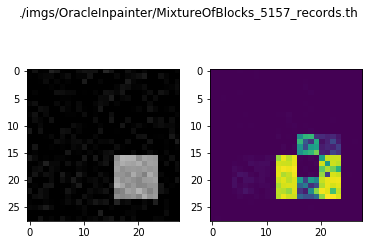

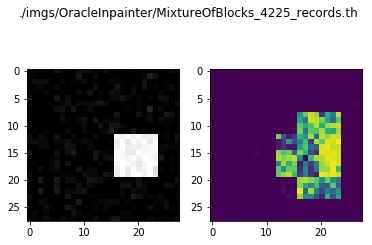

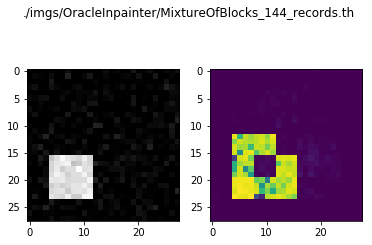

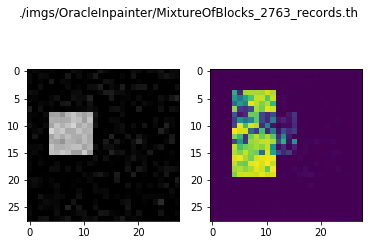

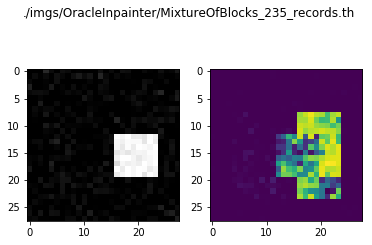

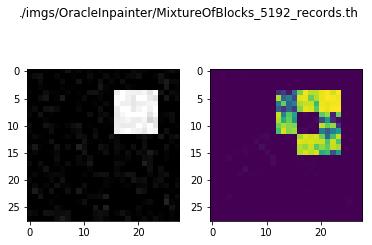

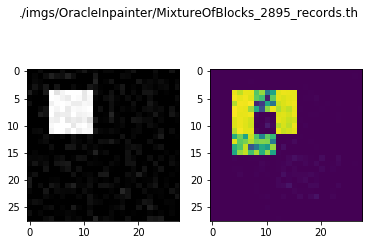

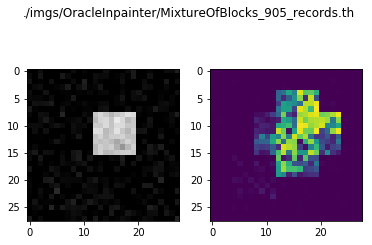

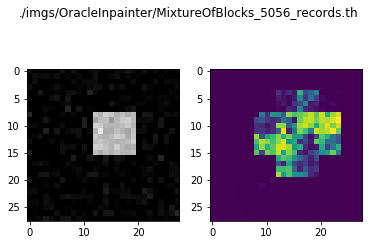

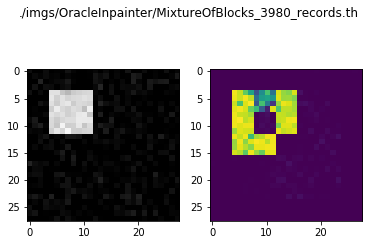

In [6]:
import torch
import torchvision
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import glob
filenames = glob.glob('./imgs/{}/*'.format(gen_model_name))
assert len(filenames) > 0, 'no files'
for filename in filenames:
    z = torch.load(filename)

    yhat = int(torch.max(z['classifier_output'], 1)[1].numpy())
    y = z['gnd_truth_label']
    print(y, yhat)


    f, a = plt.subplots(1, 2)
    a[0].imshow(z['unnormalized_img'].permute(1, 2, 0).numpy())
    a[1].imshow(z['imp_vector'])
    f.suptitle(filename)

